# Trabajo Práctico 1 - Cálculo de Ranking Page

## Enunciado

### Pregunta 1 - ¿Por que la matriz A definida en (4) es equivalente a $p \ \mathbf{W} \ \mathbf{D} + e \ z^t$ ? Justificar.

Respuesta: 

Se define en (4) la matriz $A \in \mathbb{R}^{nxn}$ donde 
$$
a_{ij} = \left\{ 
\begin{array}{lr} 
(1-p)/n + pw_{ij}/c_j & : c_j \neq 0 \\ 
1/n & : c_j = 0 
\end{array} 
\right.
$$
Donde $ n$ es igual a la cantidad de paginas web. Luego se definen la matriz $ z \in \mathbb{R}^{nx1} $ y la matriz $ D \in \mathbb{R}^{nxn}$, donde 
$$
z_{j} = \left\{ 
\begin{array}{lr} 
(1-p)/n & \text{ si } c_j \neq 0 \\ 
1/n & \text{ si } c_j = 0 
\end{array} 
\right.
\qquad
\qquad
y
\qquad
\qquad
d_{jj} = \left\{ 
\begin{array}{lr} 
 1/c_j  & \text{ si } c_j \neq 0 \\  
0 & \text{ si } c_j = 0 
\end{array}
\right.
$$
Recordemos también que la matriz de conectividad $ W $ fue definida como
$$
w_{ij} = \left\{ 
\begin{array}{lr} 
1 & \text { si la pagina j tiene un link a la pagina i} \\ 
0 & \text { si no}
\end{array} 
\right.
$$

Podemos notar que la matriz $ z$ es un vector columna, entonces $ z^T\in\mathbb{R}^{1xn} $. Tambien se define $e $, un vector columna de unos de dimensión n. 




Por lo tanto, $ A = pWD + ez^T $.


### Pregunta 2 -  ¿Cómo se garantiza existencia de la factorización $LU$? ¿ La matriz $(\mathbf{I} - p \ \mathbf{W} \ \mathbf{D})$ está bien condicionada? ¿Cómo influye el valor de $p$?

---

## Implementación

Implementar la factorización $LU$ para resolver el sistema de ecuaciones (6) que permite hallar la solución buscada (es decir, el ranking de páginas). Se podrá utilizar la función **scipy.linalg.solve_triangular** para resolver sistemas triangulares.

En el siguiente cuerpo de la notebook se genera un test que va a evaluar la función que resuelve el sistema a través de un test unitario. La resolución debe realizarse en el archivo **funciones.py** que acompaña el **template-alumnos**.

In [5]:
from funciones import *

### Test Unitario
En el archivo funciones.py hay que implementar la función que obtienen el ranking de las páginas.
Se espera que el llamado a la siguiente función arroje un valor esperado

In [ ]:
#ARCHIVOS DE ENTRADA
archivo_test = './tests/test_30_segundos.txt'
    
#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)

# defino la probabilidad de salto de continuar los links de la pagina actual
p = 0.5
# Realizo el test unitario para el calculo del mayor score, que pruebe que el codigo funciona correctamente.
print('*'*50)
print('Test unitario 1')
try:
    assert(np.isclose(obtenerMaximoRankingScore(W, p), 0.1811))
except:
    print('OUCH!! - No paso el test unitario')
else:
    print('BIEN! - Paso correctamente el test unitario')
print('*'*50)


### Test Unitarios Adicionales

El grupo **deberá** proponer al menos 3 instancias de prueba no triviales, dos de las cuales deben ser de tipo TODOS LOS NODOS CONECTADOS, y otra de tipo NINGUNO CONECTADO. La tercera instancia queda a criterio del grupo.

Para el análisis, guiarse y responder las siguientes preguntas: 

* ¿Cómo es el ranking obtenido en cada caso de acuerdo a la estructura del grafo páginas? 
* ¿Qué conclusiones pueden sacar de la interpretación de los resultados?

Graficar los grafos usando las funciones en el **funciones.py**.

---

## Enunciado

Sobre los casos de test que se encuentran en el folder `tests`, se pide realizar los análisis siguientes para todos los grafos del folder.

### Análisis Cuantitativo

Para el análisis cuantitativo, se pide, como mínimo, estudiar los tiempos de procesamiento en función del tamaño del grafo de páginas y de la densidad del mismo. Para esto, se espera que presenten gráficos mostrando los tiempos de ejecución para obtener la solución en función de la cantidad de nodos/links de diferentes grafos de páginas aleatorios.


In [6]:
def tiempoEjecucion(W, p): 
    """Calcula el tiempo de ejecucion de obtenerMaximoRankingScore en segundos

    Args:
        W: matriz de conectividad
        p: parametro del navegante aleatorio

    Returns:
        tiempo_ejecucion
    """    # calcula el tiempo de ejecucion de obtenerMaximoRankingScore 
    inicio = time.time()
    obtenerMaximoRankingScore(W, p)
    fin = time.time()
    tiempo_ejecucion = fin - inicio 
    
    return tiempo_ejecucion

def tiempoEjecucionSize (n,p): 
    """Calcula el tiempo de ejecucion en base a la dimension de W

    Args:
        n: dimensión de W
        p: parametro del navegante aleatorio

    Returns:
        lista_tiempo: lista con los tiempos de ejecucion
        lista_size: lista de dimensiones paralelo a los tiempos de ejecucion
    """    
    i=2
    lista_tiempo=[]
    lista_size=[]
    while i <=n:
        W= np.random.choice([0, 1], size=(i,i))
        np.fill_diagonal(W, 0)
        tiempo_ejecucion= tiempoEjecucion(W, p)
        lista_tiempo.append(tiempo_ejecucion)
        lista_size.append(i)
        i+=1
    return lista_tiempo, lista_size

def tiempoEjecucionDensidad (n,p):
    W=  np.zeros((n, n))
    tiempo= tiempoEjecucion(W, p)
    tiempos= []
    nodos=[]
    conexiones = 0
    tiempos.append(tiempo)
    nodos.append(conexiones)
    for i in range (0,n):
        for j in range (0,n):
            if i!=j:
                W[i][j]=1
                tiempo= tiempoEjecucion(W, p)
                tiempos.append(tiempo)
                conexiones+=1
                nodos.append(conexiones)
    return tiempos, nodos

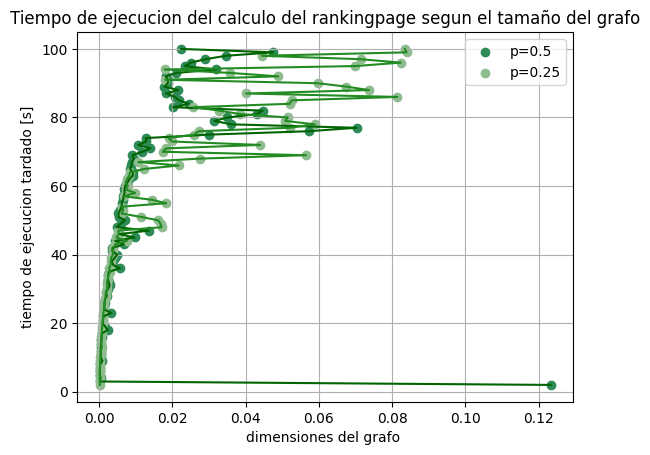

In [8]:
def graficarSize():
    tamaño1, tiempo1= tiempoEjecucionSize(100, 0.5)
    tamaño2, tiempo2= tiempoEjecucionSize(100, 0.25)

    plt.scatter(tamaño1,tiempo1, color='seagreen', label='p=0.5')
    plt.scatter(tamaño2, tiempo2, color='darkseagreen', label='p=0.25')
    plt.plot(tamaño1,tiempo1, color='darkgreen', linestyle='-')
    plt.plot(tamaño2, tiempo2, color='forestgreen', linestyle='-')
    plt.xlabel('dimensiones del grafo ')
    plt.ylabel('tiempo de ejecucion tardado [s]')
    plt.title('Tiempo de ejecucion del calculo del rankingpage segun el tamaño del grafo')
    plt.legend()
    plt.grid(True)
    plt.show()
    
graficarSize()

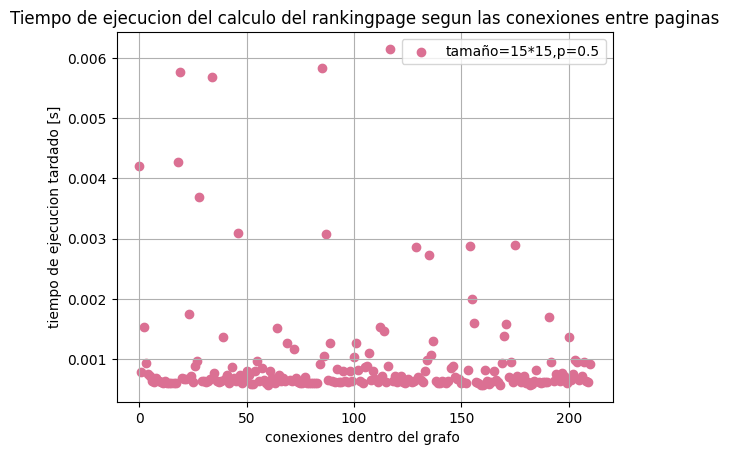

In [9]:
def graficarDensidad():
    
    tiempo, nodos= tiempoEjecucionDensidad (15,0.5)
    
    # Crear el gráfico de dispersión con múltiples conjuntos de datos
    plt.scatter(nodos,tiempo, color='palevioletred', label='tamaño=15*15,p=0.5')
    plt.xlabel('conexiones dentro del grafo ')
    plt.ylabel('tiempo de ejecucion tardado [s]')
    plt.title('Tiempo de ejecucion del calculo del rankingpage segun las conexiones entre paginas')
    plt.legend()
    plt.grid(True)
    plt.show()    
    
graficarDensidad()

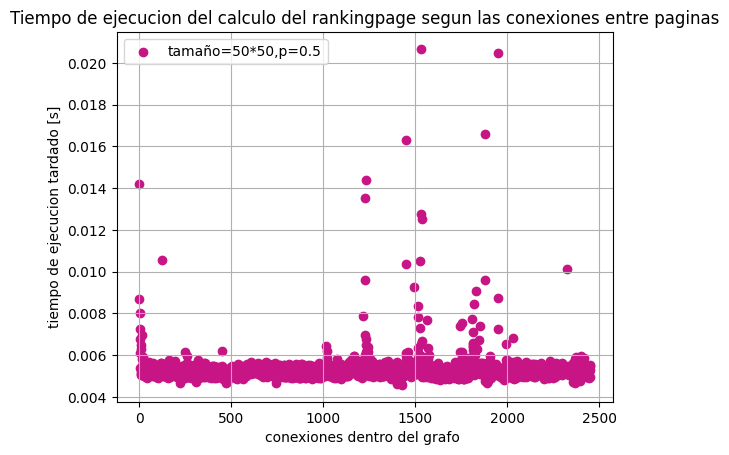

In [10]:
def graficarDensidad_2():
    
    tiempo4, nodos4= tiempoEjecucionDensidad (50,0.5)
    plt.scatter(nodos4, tiempo4, color='mediumvioletred', label='tamaño=50*50,p=0.5')
    
    # Añadir etiquetas y leyenda
    plt.xlabel('conexiones dentro del grafo ')
    plt.ylabel('tiempo de ejecucion tardado [s]')
    plt.title('Tiempo de ejecucion del calculo del rankingpage segun las conexiones entre paginas')
    plt.legend()
    plt.grid(True)
    plt.show() 

graficarDensidad_2()

### Análisis Cualitativo

Para el análisis cualitativo se deberán estudiar los rankings obtenidos, en función de la estructura del grafo, y del valor de $p$. Para esto, se espera que presenten gráficos mostrando las probabilidades de las páginas mejor rankeadas en función del valor de $p$. 


### Dos estrellas

Para el caso **test_dosestrellas.txt** se pregunta: 

¿Cuál es la mínima cantidad de links que se deben agregar para que la pagina correspondiente al nodo 1 quede primera en el ranking? ¿ Cómo se modificó la conectividad? Analizar.

